<a href="https://colab.research.google.com/github/minnjeee/SWcamp_3project_TextMining/blob/main/1_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 설치

In [ ]:
!pip install konlpy # 형태소분석기 라이브러리

In [ ]:
!pip install soynlp # # 반복 단어 정규화 라이브러리

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.8/416.8 kB 4.6 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/ssut/py-hanspell.git # 네이버 맞춤법 검사기 git소스 (오류나서 밑에내용 변경 후 밑에 코드 실행 + 런타임 재시작하기)

# # py-hanspell/hanspell/spell_checker.py 수정 (추가로 수정한 부분 존재, 뒤에 ##로 표시)
# # -*- coding: utf-8 -*-
# """
# Python용 한글 맞춤법 검사 모듈
# """

# import requests
# import json
# import time
# import sys
# from collections import OrderedDict
# import xml.etree.ElementTree as ET
# import os ##

# import re
# from urllib import parse

# from . import __version__
# from .response import Checked
# from .constants import base_url
# from .constants import CheckResult


# _agent = requests.Session()
# PY3 = sys.version_info[0] == 3

# def read_token():
#     with open("token.txt", "r") as f:
#         TOKEN = f.read()
#     return TOKEN

# def update_token(agent):
#     """update passportkey
#     from https://gist.github.com/AcrylicShrimp/4c94db38b7d2c4dd2e832a7d53654e42
#     """

#     html = agent.get(url='https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=맞춤법검사기')

#     match = re.search('passportKey=([a-zA-Z0-9]+)', html.text)
#     if match is not None:
#         TOKEN = parse.unquote(match.group(1))
#         with open("token.txt", "w") as f:
#             f.write(TOKEN)
#     return TOKEN

# def _remove_tags(text):
#     text = u'<content>{}</content>'.format(text).replace('<br>','')
#     if not PY3:
#         text = text.encode('utf-8')

#     result = ''.join(ET.fromstring(text).itertext())

#     return result



# def _get_data(text, token):
#     payload = {
#         "_callback": "window.__jindo2_callback._spellingCheck_0",
#         "q": text,
#         "color_blindness": 0,
#         "passportKey": token
#     }


#     headers = {
#         'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.133 Safari/537.36',
#         'referer': 'https://search.naver.com/',
#     }

#     start_time = time.time()
#     r = _agent.get(base_url, params=payload, headers=headers)
#     passed_time = time.time() - start_time
#     r = r.text[42:-2]
#     data = json.loads(r)
#     return passed_time, data


# def check(text):
#     if not os.path.isfile('/content/token.txt'): ##
#       update_token(_agent)

#     """
#     매개변수로 입력받은 한글 문장의 맞춤법을 체크합니다.
#     """
#     if isinstance(text, list):
#         result = []
#         for item in text:
#             checked = check(item)
#             result.append(checked)
#         return result

#     # 최대 500자까지 가능.
#     if len(text) > 500:
#         return Checked(result=False)

#     TOKEN = read_token()
#     passed_time, data = _get_data(text, TOKEN)
#     if "error" in data["message"].keys():
#         TOKEN = update_token(_agent)
#         passed_time, data = _get_data(text, TOKEN)
#         if "error" in data["message"].keys():
#             return Checked(result=False)

#     html = data['message']['result']['html']
#     result = {
#         'result': True,
#         'original': text,
#         'checked': _remove_tags(html),
#         'errors': data['message']['result']['errata_count'],
#         'time': passed_time,
#         'words': OrderedDict(),
#     }

#     # 띄어쓰기로 구분하기 위해 태그는 일단 보기 쉽게 바꿔둠.
#     # ElementTree의 iter()를 써서 더 좋게 할 수 있는 방법이 있지만
#     # 이 짧은 코드에 굳이 그렇게 할 필요성이 없으므로 일단 문자열을 치환하는 방법으로 작성.
#     html = html.replace('<em class=\'green_text\'>', '<green>') \
#                .replace('<em class=\'red_text\'>', '<red>') \
#                .replace('<em class=\'violet_text\'>', '<violet>') \
#                .replace('<em class=\'blue_text\'>', '<blue>') \
#                .replace('</em>', '<end>')
#     items = html.split(' ')
#     words = []
#     tmp = ''
#     for word in items:
#         if tmp == '' and word[:1] == '<':
#             pos = word.find('>') + 1
#             tmp = word[:pos]
#         elif tmp != '':
#             word = u'{}{}'.format(tmp, word)

#         if word[-5:] == '<end>':
#             word = word.replace('<end>', '')
#             tmp = ''

#         words.append(word)

#     for word in words:
#         check_result = CheckResult.PASSED
#         if word[:5] == '<red>':
#             check_result = CheckResult.WRONG_SPELLING
#             word = word.replace('<red>', '')
#         elif word[:7] == '<green>':
#             check_result = CheckResult.WRONG_SPACING
#             word = word.replace('<green>', '')
#         elif word[:8] == '<violet>':
#             check_result = CheckResult.AMBIGUOUS
#             word = word.replace('<violet>', '')
#         elif word[:6] == '<blue>':
#             check_result = CheckResult.STATISTICAL_CORRECTION
#             word = word.replace('<blue>', '')
#         result['words'][word] = check_result

#     result = Checked(**result)

#     return result

Cloning into 'py-hanspell'...
remote: Enumerating objects: 110, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 110 (delta 16), reused 11 (delta 9), pack-reused 88
Receiving objects: 100% (110/110), 22.36 KiB | 7.45 MiB/s, done.
Resolving deltas: 100% (55/55), done.


In [ ]:
!cd /content/py-hanspell && python setup.py install
# 런타임 다시시작하기

/usr/local/lib/python3.10/dist-packages/setuptools/dist.py:755: SetuptoolsDeprecationWarning: Invalid dash-separated options
!!

        ********************************************************************************
        Usage of dash-separated 'description-file' will not be supported in future
        versions. Please use the underscore name 'description_file' instead.

        This deprecation is overdue, please update your project and remove deprecated
        calls to avoid build errors in the future.

        See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
        ********************************************************************************

!!
  opt = self.warn_dash_deprecation(opt, section)
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
 

In [ ]:
!pip install googletrans==4.0.0-rc1 # 구글 번역기 라이브러리

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=e6810b4a9a5e4f519fa729669700071e71a5099d56f133bccbc8876d949ea665
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling c

In [ ]:
!pip install fasttext # 언어 감지 관련 라이브러리

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199772 sha256=d243c5e04615e7394585824bba645a2766aed749fa6425ac44bb107f6163aea9
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
!pip install kss # 문장 단위 분리 라이브러리

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 46.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kss: filename=kss-4.5.4-py3-none-any.whl size=54465 sha256=761f5d405c8c1a5e4b049515faedd2bfd690976e750d8286d2fa88ae8f5cc882
  Stored in directory: /root/.cache/pip/wheels/61/7b/ba/e620ef5d96a61cdd83bdee4c2bb4aec8a74de5d72fcbb00e80
  Created wheel for pecab: filename=pecab-1.0.8-py3-none-any.whl size=26646664 sha256=bb643e9476a6b795443c69b869970d3ab7300449bd9c5fe4b25feb99716e15db
  Stored in directory: /root/.cache/pip/wheels/5c/6f/b4/ab61b8863d7d8b1409def8ae31adcaa089fa91b8d022ec309d
Successfully built kss pecab


# 폰트 환경 설정

--2023-10-25 16:38:35--  https://github.com/byungjooyoo/Dataset/raw/main/NanumGothic.ttf
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/byungjooyoo/Dataset/main/NanumGothic.ttf [following]
--2023-10-25 16:38:36--  https://raw.githubusercontent.com/byungjooyoo/Dataset/main/NanumGothic.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4343844 (4.1M) [application/octet-stream]
Saving to: ‘NanumGothic.ttf.1’

NanumGothic.ttf.1   100%[===================>]   4.14M  11.2MB/s    in 0.4s    

2023-10-25 16:38:37 (11.2 MB/s) - ‘NanumGothic.ttf.1’ saved [4343844/4343844]



<Axes: title={'center': '한글'}>

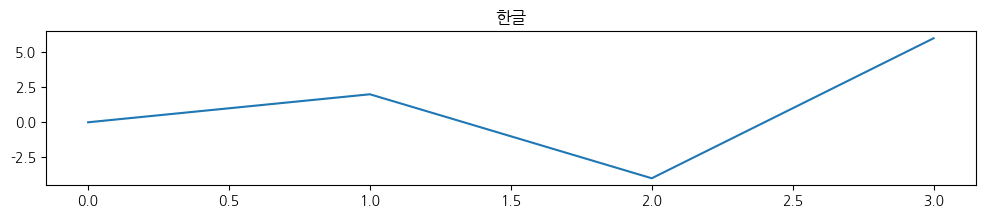

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
!wget https://github.com/byungjooyoo/Dataset/raw/main/NanumGothic.ttf
mpl.font_manager.fontManager.addfont('NanumGothic.ttf')
mpl.rc('font', family='NanumGothic')
plt.rc("axes", unicode_minus=False)

# 한글 폰트 확인하기
import pandas as pd
pd.Series([0,2,-4,6]).plot(title="한글", figsize=(12, 2))

# 라이브러리 임포트

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import math
import pickle

In [ ]:
import re # 정규표현식
from hanspell import spell_checker # 철자 검사 + 자동 스페이스
from soynlp.normalizer import emoticon_normalize, repeat_normalize # 반복 단어 정규화
import kss

# 번역 관련 라이브러리
import fasttext
from googletrans import Translator # 구글 번역기

# 데이터셋 준비

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정/Re:Source/reviews.csv')
data

,name,star,date,content,utility,g_no
0,최유진,5,2023년 9월 6일,광고는 한판 할때마다 뜨긴하는데 꽤 괜찮은 게임입니다. 돈 모아서 어디쓰나 했더니 ...,98.0,1
1,김세희,5,2023년 9월 10일,광고봐서 내용만 재밌는 그런게임인줄 알았는데 재밌네요,47.0,1
2,정희원,5,2023년 10월 2일,너무 재밌고 꾸미는 재미가 있어요!,4.0,1
3,이지윤,5,2023년 10월 7일,님들도 헤봐용 너무 제밌고 웃께용 👍 따봉,NaN,1
4,김땅콩,1,2023년 9월 19일,전형적인 양산형 최악의 게임 입니다.,20.0,1
...,...,...,...,...,...,...
42591,날아라슈퍼보드팬크레용팝팬,4,2022년 2월 27일,아진짜.,3.0,45
42592,이대부,5,2022년 2월 25일,ㅓㅕㅍ셔ㅛㅛ,2.0,45
42593,Google 사용자,5,2022년 2월 28일,재밌다,2.0,45
42594,허주환,1,2022년 3월 22일,노잼,0.0,45


In [ ]:
# reviews 열에서 중복인 내용이 있다면 중복 제거
data.drop_duplicates(subset=['content'], inplace=True)
print("중복 내용 제거한 리뷰 수 : ", len(data))

중복 내용 제거한 리뷰 수 :  38552


In [ ]:
# null값 있는지 확인
print(data['content'].isnull().values.any())

False


In [ ]:
data.reset_index(drop=True, inplace=True)

# 데이터 전처리

In [ ]:
model = fasttext.load_model('/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정/Re:Source/lid.176.ftz') # 언어감지를 위한 모델
# 오류 발생 시, 오류 발생한 리뷰를 담을 빈 리스트 생성
valueErrorContent = []
jsonDecodeErrorContent = []
UnicodeEncodeErrorContent = []
TypeErrorContent = []
IndexErrorContent = []
import json
import requests
from requests.exceptions import ReadTimeout

def preprocessing(text):
  # 1) 한글과 공백을 제외하고 모두 제거
  rule = re.compile('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]')
  pre1 = rule.sub(' ', text)

  # 2) hangeul 이 공백이면 (한글이 아예 없으면) 한국어가 아닌 경우 번역
  if pre1.replace(' ','') == '':
    detected_language = model.predict(text, k=1)[0][0]  # 해당 텍스트 리뷰의 언어 감지
    if detected_language != '__label__ko':  # 언어가 한국어가 아니면
      try:
        translator = Translator() # 구글 번역기 생성
        detected = translator.detect(text) # 리뷰 언어 감지
        translated = translator.translate(text, "ko", detected.lang) # 한국어로 번역
        pre1 = translated.text
      except ValueError as e:
        # 영어로 작성된 리뷰에 오타가 있을 경우(ex. Graet!), 영어로 인식을 못하여 에러 발생
        print("'", text, "' 리뷰에 ValueError가 발생했습니다:", e)
        valueErrorContent.append(text)
        return None
      except TypeError as e2:
        print("'", text, "' 리뷰에 TypeError가 발생했습니다:", e2)
        TypeErrorContent.append(text)
        return None
      except IndexError as e3:
        print("'", text, "' IndexErrorContent 발생", e3)
        IndexErrorContent.append(text)
      except ReadTimeout:
        print("'", text, "' 리뷰에 ReadTimeout 발생했습니다:")
        return None


  # 3) 맞춤법, 띄어쓰기 교정
  result = ''
  try:
    # 네이버 맞춤법 검사기가 최대 300자까지 지원
    if len(pre1) < 300 : # 리뷰 길이가 300자보다 짧으면
      result += spell_checker.check(pre1).checked
    else: # 300자보다 길면
        for sent in kss.split_sentences(pre1): # 문장 단위로 나눠서 검사
          result += spell_checker.check(sent).checked
  except json.JSONDecodeError as e1 :
    # 문장 단위로 나누어지지 않아서 문장 길이가 너무 길면 에러 발생
    print("'", text, "' 리뷰에 JSONDecodeError가 발생했습니다:", e1)
    jsonDecodeErrorContent.append(text)
    return None
  except UnicodeEncodeError as e2:
    # 리뷰에 이모티콘만 존재하면 에러 발생
    print("'", text, "' 리뷰에 UnicodeEncodeError가 발생했습니다:", e2)
    UnicodeEncodeErrorContent.append(text)
    return None
  except ReadTimeout:
    print("'", text, "' 리뷰에 ReadTimeout 발생했습니다:")
    return None

  pre2 = result

  # 4) 반복 문자 정제
  pre3 = emoticon_normalize(pre2, num_repeats=2)
  pre4 = repeat_normalize(pre3, num_repeats=2)

  return pre4

In [ ]:
tqdm.pandas()  # tqdm의 pandas 기능을 활성화

data['pre'] = data['content'].progress_apply(preprocessing)

  5%|▍         | 1742/38552 [07:44<3:42:21,  2.76it/s]

' Graet! ' 리뷰에 ValueError가 발생했습니다: invalid source language


 11%|█         | 4263/38552 [19:52<2:07:53,  4.47it/s]

' 광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고광고 ' 리뷰에 JSONDecodeError가 발생했습니다: Expecting value: line 1 column 1 (char 0)


 13%|█▎        | 5140/38552 [23:28<3:46:40,  2.46it/s]

' 🏳️‍🌈🦄🏳️‍🌈🦄🏳️‍🌈🦄🏳️‍🌈🦄🏳️‍🌈🦄🏳️‍🌈🦄🏳️‍🌈🦄🏳️‍🌈🦄🏳️‍🌈🦄🏳️‍🌈🦄🏳️‍🌈🦄🏳️‍🌈🦄🏳️‍🌈🦄🏳️‍🌈🦄🏳️‍🌈🦄🏳️‍🌈🦄🏳️‍🌈🦄🏳️‍🌈🦄🏳️‍🌈🦄🏳️‍🌈🦄🏳️‍🌈🦄🏳️‍🌈🦄🏳️‍🌈🦄🏳️‍🌈🐫🦄🏳️‍🌈🐰🐰🐰🐇🐇🐇🏳️‍🌈🐇🏳️‍🌈🐇🏳️‍🌈🐇🦄🏳️‍🌈🦄🐇🏳️‍🌈🦄🐇🏳️‍🌈🦄🐇🐫🏳️‍🌈🦄🐇🦄🐇🏳️‍🌈🦄🦒🏳️‍🌈🦄🐇🏳️‍🌈🦄🐇🏳️‍🌈🦄🐇🏳️‍🌈🦄🐇🏳️‍🌈🐇🐇🏳️‍🌈🐃🐇🏳️‍🌈🦄🐇🏳️‍🌈🐇🐿🏳️‍🌈🦄🐇🐿🏳️‍🌈🐇🐇🐿🏳️‍🌈🦄🐇🐿🏳️‍🌈🦄🐇🐿🐿🐿🐿🐿🐿🐿🐿🐿🐿🐿🐿🐿🐿🐿🐿🐿🐿🐿🐿🐿🐿🐿😯🐿🐿🐿🐿🐿🐿🐿🐿🏳️‍🌈🐿🐿🐿🏳️‍ ' 리뷰에 UnicodeEncodeError가 발생했습니다: 'utf-8' codec can't encode character '\udd84' in position 284: surrogates not allowed


 42%|████▏     | 16023/38552 [1:11:20<1:49:00,  3.44it/s]

' Ggoo ' 리뷰에 ValueError가 발생했습니다: invalid source language


 57%|█████▋    | 21985/38552 [1:40:34<51:53,  5.32it/s]

' jeheq ' 리뷰에 ValueError가 발생했습니다: invalid source language


 72%|███████▏  | 27827/38552 [2:09:14<42:42,  4.18it/s]

' 오버워치? 롤? 저리가라다. 이것이 진정한 더킹갓제네럴엠비션리마스터판타스틱엘라스틱치즈스틱찹스틱붐바스틱지화자따봉레전더리충무공6인궁허니버터지져스내셔널앱솔루트리미티드먼치킨군계일학다크호스프레지던트바론스틸월드클래스엠페러올드스쿨킹크랩치즈그라탕카사노바강남스타일대물수제작포켓몬고카와이올타임레전드해적왕슈퍼루키크리티컬업그레이드그레이드엘리트최고급클래시컬스테디셀러어드벤스드멘사금메달리스트전교회장깨시민뿌링클혼모노유니버셜언프레딕터블석유재벌VIP로얄비선실세금발미녀금수저풀차징만수무강하버드유니버시티천상계베테랑건물주17FW간장게장아나스타샤슈프림홍진호홍진호말년병장칼서렌얼짱카이저소제문벌귀족주지육림뉴블러드정점S라인백년해로김도진엄마카드일루미나틸누텔라비브라뉴임시공휴일슈퍼히어로좌중을압도하는아킬레스건학익진순살섹스어필트렌드세터다용도탈인간하이테크크리스마스지니어스오버클럭우주대스타사일런트맥가이버세레나데주상전하뉴제네레이션원탑알파고데스티네이션빈티지약방의감초해피버스데이밸붕올라운더오이사마에스트로에픽인빈저블유니크어메이징 갓겜이다 ' 리뷰에 JSONDecodeError가 발생했습니다: Expecting value: line 1 column 1 (char 0)


 79%|███████▉  | 30575/38552 [2:22:55<38:49,  3.42it/s]

' T.TT ' IndexErrorContent 발생 list index out of range


100%|██████████| 38552/38552 [3:02:48<00:00,  3.51it/s]


In [ ]:
# '노잼'이라는 게임 리뷰의 핵심 단어가 '나 잼'으로 맞춤법 검사 결과 변형된 것을 확인
# '나 잼' 을 '노잼' 으로 변경
data['pre'] = data['pre'].str.replace('나 잼', '노잼')

In [ ]:
# 전처리 결과 null값 존재하는지 확인
print(data['pre'].isnull().values.any())  # True : null값 존재

True


In [ ]:
# null값인 데이터 출력해보기
data[data['pre'].isnull()]

,name,star,date,content,utility,g_no,pre
23,신신애,5,2023년 9월 10일,🥰,1.0,1,NaN
695,nari Jang,5,2021년 10월 10일,🎹🎹🎹🎹🎹🎹🎹📯📣🎤🎶,NaN,2,NaN
705,황오깡공주,5,2021년 7월 19일,👍👍👍👍👍👍👍👍👍👍👍👍,NaN,2,NaN
727,MEIXIANG PIAO,1,2021년 2월 19일,👎,4.0,2,NaN
749,감선화,1,2023년 7월 9일,🤬🤬🤬🤬🇰🇷🇰🇷🇰🇷🇰🇷🇰🇷🤬🥢🤬🤬🤬🤬🤬🤬🤬🤬,NaN,2,NaN
...,...,...,...,...,...,...,...
38302,Google 사용자,5,2020년 1월 28일,👊👍👎🖐🤘🤙👌🤞🖖,0.0,43,NaN
38385,Google 사용자,5,2020년 2월 28일,👍🏻👍🏻,0.0,43,NaN
38387,이파름,3,2020년 9월 23일,😍😍😍😍😍😍,1.0,43,NaN
38394,Google 사용자,5,2020년 2월 18일,😇,0.0,43,NaN


In [ ]:
# null값인 데이터 제거
data = data.dropna(subset=['pre'])
data

,name,star,date,content,utility,g_no,pre
0,최유진,5,2023년 9월 6일,광고는 한판 할때마다 뜨긴하는데 꽤 괜찮은 게임입니다. 돈 모아서 어디쓰나 했더니 ...,98.0,1,광고는 한판 할 때마다 뜨긴 하는데 꽤 괜찮은 게임입니다돈 모아서 어디 쓰나 했더니...
1,김세희,5,2023년 9월 10일,광고봐서 내용만 재밌는 그런게임인줄 알았는데 재밌네요,47.0,1,광고 봐서 내용만 재밌는 그런 게임인 줄 알았는데 재밌네요
2,정희원,5,2023년 10월 2일,너무 재밌고 꾸미는 재미가 있어요!,4.0,1,너무 재밌고 꾸미는 재미가 있어요
3,이지윤,5,2023년 10월 7일,님들도 헤봐용 너무 제밌고 웃께용 👍 따봉,NaN,1,님들도 헤봐용 너무 재밌고 웃께 용 따봉
4,김땅콩,1,2023년 9월 19일,전형적인 양산형 최악의 게임 입니다.,20.0,1,전형적인 양산형 최악의 게임입니다
...,...,...,...,...,...,...,...
38547,강정미,5,2022년 2월 21일,꿀밤,3.0,45,꿀밤
38548,바보,4,2022년 2월 27일,Please reduce ads 😭😭🙄🙁😶,2.0,45,광고를 줄이십시오
38549,byungchul han,5,2022년 8월 7일,회생 후.,0.0,45,회생 후
38550,날아라슈퍼보드팬크레용팝팬,4,2022년 2월 27일,아진짜.,3.0,45,아 진짜


In [ ]:
# 다시 null값 존재하는지 확인
print(data['pre'].isnull().values.any())  # False : null값 없음!

False


In [ ]:
data.reset_index(drop=True,inplace=True)

In [ ]:
data.to_csv('/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정/Re:Source/data_pre.csv', index=False) # 전처리된 리뷰 필드 추가된 df 저장